Status: ✅ Done

## Exercise 2

---

In this exercise, we practice the theory behind supervised and unsupervised methods as well as linear regression.

> Imports

In [1]:
from sklearn import datasets
import numpy as np

### Supervised vs Unsupervised problems

---

> Exercise 1

For each of the following problems, determine whether the problem is supervised or unsupervised.

(a) Given detailed phone usage from many people, find interesting groups of people with similar behaviour.

(b) Given detailed phone usage of many users along with their historic churn, predict if people are going to
change contracts again.

(c) Given expression measurements of 1000s of genes for 100s of patients along with a binary variable indicating
presence or absence of a specific cancer, predict if the cancer is present for a new patient.

(d) Given expression measurements of 1000s of genes for 100s of patients, find groups of functionally similar
genes.

**Solution**

(a) Since we have no response variable $$y$$ to train on, it is `unsupervised`

(b) In this case, our features might be number of calls, amount of data used for example per last month, and we also have access to whether the given customer
ended subsciption to the given service or not. (target variable) Therefore, this is `supervised`.

(c) Again, we have access to the binary target variable, therefore `supervised`.

(d) In this case, there is no response variable, but we are rather searching for groups (i.e. observations with similar features), therefore `unsupervised`.

### Classification vs Regression

---

> Exercise 2

For data with each of the following outcome variables, determine whether the problem is suitable for classification or regression:
(a) Presence or absence of cancer.

(b) Favourite fruits

(c) Annual income in kroner

(d) Income bracket

**Solution**

(a) This is an example of `binary classification`.

(b) This is `multi-class classification`.

(c) This is `regression` since we are predicting a `continuous value`.

(d) Assuming there is limited number of brackets, this is again `multi-class classification`.

### Linear regression models

---

> Exercise 3 and 4

Imagine we have a dataset with two features: $$x_1$$ and $$x_2$$ that are numerical (real-valued) variables
Consider the following models:

(a) $$Y=\beta_0+\beta_1 x_1+\epsilon$$

(b) $$Y=\beta_0+\beta_1 x_1+\beta_2 x_2+\epsilon$$

(c) $$Y=\beta_0+\beta_1 x_1+\beta_2 x_2+\beta_3\left(x_1 x_2\right)+\epsilon$$

(d) $$Y=\beta_0+\beta_1 x_1+\beta_2 x_2+\beta_3\left(x_1 x_2\right)+\beta_4 x_1^2+\beta_5 x_2^2+\epsilon$$


Explain how a unit change in $$x1$$ would affect $$y$$ (leaving $$x_2$$ unchanged) in each model (a-d) Make a sketch of the functional relationship between $$Y$$ and the two features in each of the models. (a-d)

**Solution (3 & 4)**
To find how a small change in $$x1$$ would affect the overall output, we can simply differentiate $$Y$$ with respect to $$x_1$$. Therefore:

(a) $$\frac{dY}{dx_1} = \beta_1$$ - in this case, the change is constant which should make sense given the model is just a simple line

(b) $$\frac{\partial Y}{\partial x_1} = \beta_1$$ - this might look very similar to `(a)`, but notice that this is only a partial derivative. Why does it make sense that we have got again $$\beta_1$$?
Try to checkout this [Geogebra applet](https://www.geogebra.org/m/ptzufvkv), for the function, you can for instance write `1 + 0.5x + 2y` which should give you a nice plane. Then tick y as constant.
You should then see how two planes intersect, i.e., you should see a line. One plane is the model, the other represents the fixed $$x_2$$. And this is the reason why we obtained exact same result as in `(a)`,
since we are again looking at a line which grows/decreases constantly. If you feel still bit unsure, I suggest you check this short [video](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-and-graphs) about how to interpret partial derivative. Overall, the answer is that by changing $$x_1$$, $$y$$ would be again affected in a constant manner.

(c) $$\frac{\partial Y}{\partial x_1} = \beta_1 + \beta_3x_2$$ - now it got more interesting since the partial derivative is no longer constant but depends on $$x_2$$. Again, if you use the above applet with the new model, you should see why. First of all, our model no longer looks like a plane, but rather looks bit more complex, yet it is still `linear`. (liear in its `coefficients`, but it is non-linear from a perspective of its features) Try to slide with the $$Y$$ (in our case this is $$x_2$$), you should be able to see how the intersection line changes. In other words, when we want to know how output changes if we change $$x_1$$, we have to take into consideration also where we are in terms of $$x_2$$ position. Therefore the rate of change in this case is `linear` as can also be deduced from the obtained partial derivative equation.

(d) $$\frac{\partial Y}{\partial x_1} = \beta_1 + \beta_3x_2 + 2\beta_4x_1$$ - this is the most complex model which can also be seen from the Geogebra applet. In this case, not only the $$x_2$$ determines the rate of change but we also we have to consider position on $$x_1$$. This makes sense since the intersection is no longer a line but a `parabolla` which grows/decreases at different rates based on the $$x_1$$. Again, as can be seen from the first partial derivative of the model, the change of $$x_1$$ would translate into linear change in the output. 

I believe the main takeaway from this exercise is that the more complex model, the more is the output variable impacted by little changes in the given feature. You could see that for the model represented by plane, the rate of change was always constant, where as for the more complex models, the rate of change was linear depending on the input features.

> Exercise 5

Explain how the design matrix would look in each model.

**Solution**

We know that the design matrix has $$n$$ rows depending on the number of samples, and $$p + 1$$ columns where $$p$$ denotes the number of features. Plus one is because we also need to add column full of ones to account for the bias term. Therefore the design matrix shape would be in:

(a) $$n \times 2$$

(b) $$n \times 3$$

(c) $$n \times 4$$

(d) $$n \times 6$$

Introduce now a third, categorical, feature C with two levels yes/no (for the first model and similarly it would look like for other models):

$$
Y=\beta_0+\beta_1 x_1+\beta_2 C_{\mathrm{yes}}+\epsilon
$$

> Exercise 7

Can you sketch (or explain) the change to the relationship between $$Y$$ and $$x_1$$ and $$x_2$$ if you
introduce interactions between $$C$$ and $$x_1$$ and between $$C$$ and $$x_2$$ in each of the four models (a-d).

**Solution**

In practive, we will be adding some constant $$\beta_{p}$$ in case the answer is `yes`. In other words, it means that the final prediction will be offseted by this constant. In python, you could make a simple `if-else` statement and then based on the answer (yes/no) add or not the given constant. In the training phase, it will be determined what should be value of this constant since it is one of model's parameters.

### Exploratory data analysis

---

Let's **load the data** first:

In [ ]:
bunch = datasets.load_wine(return_X_y=False, as_frame=True)
df = bunch.frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Then, we can make a scatter plot between `color` and `alcohol`:

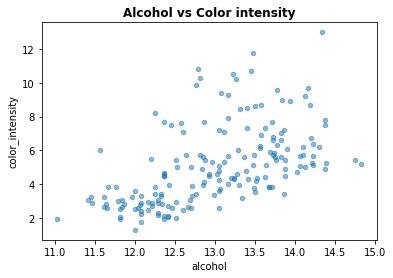

In [ ]:
ax = df.plot.scatter('alcohol', 'color_intensity', alpha=.5)
ax.set_title('Alcohol vs Color intensity', weight = 'bold');

There seeems to be a sign of a linear relationship, but we might need more complex model.

### Fitting model

---

Below, I fit the model using the three methods. As you can tell, `statsmodel` gives you way more information as well as more control over the whole model, where as `sklearn` is just easy to use.

In [ ]:
X = np.array(df['alcohol']).reshape(len(df['alcohol']), 1)
y = df['color_intensity']

##### Using `statsmodel.api`

In [ ]:
import statsmodels.api as sm

In [ ]:
Xc = sm.add_constant(X) # must be explicitly added -.-
results = sm.OLS(y, Xc).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        color_intensity   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     74.90
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           3.06e-15
Time:                        19:24:19   Log-Likelihood:                -370.18
No. Observations:                 178   AIC:                             744.4
Df Residuals:                     176   BIC:                             750.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2257      2.348     -6.484      0.000     -19.860     -10.591
x1             1.5602      0.180      8.654      0.000       1.204       1.916
==============================================================================
Omnibus:                       36.476   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.633
Skew:                           1.207   Prob(JB):                     6.14e-12
Kurtosis:                       4.064   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Using `statsmodels.formula.api`

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
results = smf.ols('color_intensity ~ alcohol', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        color_intensity   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     74.90
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           3.06e-15
Time:                        19:24:19   Log-Likelihood:                -370.18
No. Observations:                 178   AIC:                             744.4
Df Residuals:                     176   BIC:                             750.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2257      2.348     -6.484      0.000     -19.860     -10.591
alcohol        1.5602      0.180      8.654      0.000       1.204       1.916
==============================================================================
Omnibus:                       36.476   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.633
Skew:                           1.207   Prob(JB):                     6.14e-12
Kurtosis:                       4.064   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Using `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

print('Coefficient corresponding to alcohol\n---')
print(lr.coef_[0])
print()
print('Fitted intercept\n---')
print(lr.intercept_)
print()
print('R2\n---')
print(lr.score(X, y))

Coefficient corresponding to alcohol
---
1.5602204843456795

Fitted intercept
---
-15.225740595669553

R2
---
0.2985138336694634


### 📏 Vectorization

---


Let's first define the **predict** method:

In [ ]:
def predict(theta, bias, X):

    """LR prediction method

    Attributes
    ---
    theta : 2D array
        p x 1 array where p is the number of features
    
    bias : 2D array
        n x 1 where n is the number of samples

    X : 2D array
        n x p array 

    Returns
    ---
    2D array
        n x 1 array where each entry represents the prediction
    """

    return X @ theta + bias  

Now, let's **test it out**:

In [ ]:
theta = lr.coef_.reshape(1, 1)
n = X.shape[0]
bias = np.array([lr.intercept_]*n).reshape(n , 1)

predict(theta, bias, X).flatten() == lr.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Adding new variable of own choice and signifficance test

---

Let's try to add `hue`:

In [ ]:
results = smf.ols('color_intensity ~ alcohol + hue', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        color_intensity   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     99.72
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.24e-29
Time:                        19:24:19   Log-Likelihood:                -334.04
No. Observations:                 178   AIC:                             674.1
Df Residuals:                     175   BIC:                             683.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.2227      2.026     -4.551      0.000     -13.222      -5.223
alcohol        1.4608      0.148      9.873      0.000       1.169       1.753
hue           -4.9202      0.526     -9.363      0.000      -5.957      -3.883
==============================================================================
Omnibus:                        9.360   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.551
Skew:                           0.563   Prob(JB):                      0.00843
Kurtosis:                       3.134   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary we can see that `hue` passes signifficance test since $$p < 0.05$$. More specifically, our null hypothesis says $$H_0: \theta_2 = 0$$ (i.e. we assume its coefficient should be zero since this feature does not matter). We then compute test statistic $$t$$ which we use along with **student distribution** to compute the $$p$$. Since $$p$$ is extremelly small (close to zero), we conclude we failed to find enough evidence for our null hypothesis and as such we reject it in favour of our alternative hypothesis, i.e., $$H_A: \theta_2 \ne 0$$.

Alternatively, we could also look at the result of the `F-test` in the above summary. From there we can see that the $$p < 0.05$$ and as such we can reject the null hypothesis (i.e. intercept only model is better than our model) in favor of the alternative hypothesis (i.e. jointly our model's parameters are statistically signifficant). 

In summary, `F-test` is more useful when we want to compare two models as a whole where as `t-test` is more suitable when you want to focus on particular parameters of the given model.

###  Creating a categorical variable and fitting a model

---

Let's turn `ash` into categorial feature with three levels:

In [ ]:
feature = 'ash'

rng = df[feature].max() - df[feature].min()
step = rng/2
start = df[feature].min()

df['C1'] = (df['ash'] < start + step).astype(int)
df['C2'] = ((start + step < df[feature]) & (df[feature] < start + 1.2*step)).astype(int)

Now, let's fit the model with **parallel** lines:

In [ ]:
results = smf.ols('color_intensity ~ alcohol + C1 + C2', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        color_intensity   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     27.05
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.08e-14
Time:                        19:24:19   Log-Likelihood:                -367.67
No. Observations:                 178   AIC:                             743.3
Df Residuals:                     174   BIC:                             756.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.8046      2.424     -5.696      0.000     -18.588      -9.021
alcohol        1.4627      0.184      7.948      0.000       1.099       1.826
C1            -0.5640      0.354     -1.594      0.113      -1.262       0.134
C2             0.2039      0.369      0.553      0.581      -0.524       0.932
==============================================================================
Omnibus:                       38.545   Durbin-Watson:                   0.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.324
Skew:                           1.235   Prob(JB):                     5.88e-13
Kurtosis:                       4.222   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

And we can **visualize** it as follows (For clarity you can comment out for instance `C2`):

In [ ]:
import matplotlib.pyplot as plt

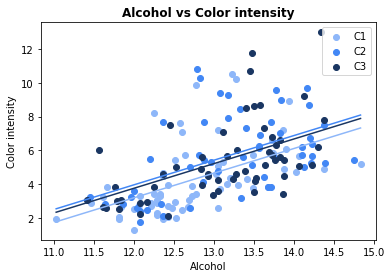

In [ ]:
fig, ax = plt.subplots()

# Colors
C1 = '#8eb7f9'
C2 = '#4287f5'
C3 = '#1a3662'

# Points
x1 = df[df['C1'] == 1]
x2 = df[df['C2'] == 1]
x3 = df[(df['C1'] == 0) & (df['C2'] == 0)]

ax.scatter(x1['alcohol'], x1['color_intensity'], color=C1, label='C1');
ax.scatter(x2['alcohol'], x2['color_intensity'], color=C2, label='C2');
ax.scatter(x3['alcohol'], x3['color_intensity'], color=C3, label='C3');

# Lines
x = np.linspace(df['alcohol'].min(), df['alcohol'].max(), num=100)
y1 = x*results.params.alcohol + results.params.C1 + results.params.Intercept
y2 = x*results.params.alcohol + results.params.C2 + results.params.Intercept
y3 = x*results.params.alcohol + results.params.Intercept

ax.plot(x, y1, color=C1);
ax.plot(x, y2, color=C2);
ax.plot(x, y3, color=C3);

# Labels
ax.set_title('Alcohol vs Color intensity', weight = 'bold');
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color intensity')
ax.legend();

This is nice, but as of now, unit change in alcohol would impact color intensity proportionally to the coefficient associated with the alcohol. (Try to differentiate the above model with respect to alcohol) But what if the `categorical` variable also plays a role? To account for this, we can add an `interaction` terms between alcohol and the categorical variable.

In [ ]:
results = smf.ols('color_intensity ~ alcohol + C1 + C2 + C1*alcohol + C2*alcohol', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        color_intensity   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     16.17
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           4.71e-13
Time:                        19:24:19   Log-Likelihood:                -367.45
No. Observations:                 178   AIC:                             746.9
Df Residuals:                     172   BIC:                             766.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.9523      4.202     -3.796      0.000     -24.247      -7.658
alcohol        1.6267      0.320      5.079      0.000       0.995       2.259
C1             2.1530      5.852      0.368      0.713      -9.399      13.705
C2             3.9365      5.981      0.658      0.511      -7.870      15.743
C1:alcohol    -0.2086      0.452     -0.462      0.645      -1.100       0.683
C2:alcohol    -0.2840      0.454     -0.626      0.532      -1.180       0.612
==============================================================================
Omnibus:                       37.173   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.273
Skew:                           1.212   Prob(JB):                     2.70e-12
Kurtosis:                       4.145   Cond. No.                         819.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, we can **visualize** it (the only changes are in `lines` section):

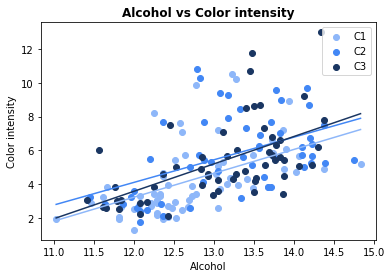

In [ ]:
fig, ax = plt.subplots()

# Colors
C1 = '#8eb7f9'
C2 = '#4287f5'
C3 = '#1a3662'

# Points
x1 = df[df['C1'] == 1]
x2 = df[df['C2'] == 1]
x3 = df[(df['C1'] == 0) & (df['C2'] == 0)]

ax.scatter(x1['alcohol'], x1['color_intensity'], color=C1, label='C1');
ax.scatter(x2['alcohol'], x2['color_intensity'], color=C2, label='C2');
ax.scatter(x3['alcohol'], x3['color_intensity'], color=C3, label='C3');

# Lines (Compare to the previous - I have added one term for each y1 and y2)
x = np.linspace(df['alcohol'].min(), df['alcohol'].max(), num=100)
y1 = x*results.params.alcohol + results.params.C1 + x*results.params['C1:alcohol'] + results.params.Intercept
y2 = x*results.params.alcohol + results.params.C2 + x*results.params['C2:alcohol'] + results.params.Intercept
y3 = x*results.params.alcohol + results.params.Intercept

ax.plot(x, y1, color=C1);
ax.plot(x, y2, color=C2);
ax.plot(x, y3, color=C3);

# Labels
ax.set_title('Alcohol vs Color intensity', weight = 'bold');
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color intensity')
ax.legend();

---

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d8dca23-23e7-4025-ac63-043dc7efa151' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>